# Import Libraries

In [1]:
# data handling
import pandas as pd
import numpy as np

# ploting
import matplotlib.pyplot as plt

# set up model
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import roc_auc_score, accuracy_score, fbeta_score

In [2]:
df = pd.read_csv('telco_dataset.csv', index_col=False)

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
0,4808-GHDJN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7044,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7045,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7046,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

In [4]:
# check dtypes and any missing values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7044 non-null   object 
 1   gender            7044 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset consists of demographics of the customers, account information, consumption information, provided services and whether the customer defaulted on their telco payment.

In [5]:
# get total number of missing values
df.isnull().sum()

customerID          4
gender              4
SeniorCitizen       5
Partner             5
Dependents          5
tenure              5
PhoneService        5
MultipleLines       5
InternetService     5
OnlineSecurity      5
OnlineBackup        5
DeviceProtection    5
TechSupport         5
StreamingTV         5
StreamingMovies     5
Contract            5
PaperlessBilling    5
PaymentMethod       5
MonthlyCharges      5
TotalCharges        5
Default             5
dtype: int64

Since most of the columns do not have much missing values (only 4 - 5), I can safely remove any rows with missing values without any significant loss in data.

## Remove Missing Data

In [6]:
# remove rows with missing data
df.dropna(axis=0, inplace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
1,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7044,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7045,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7046,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Remove Redulent Data

customerID does not provide any useful information in predicting default payments, hence I will remove it as well.

In [7]:
# remove customerID from df
df.drop('customerID', axis=1, inplace=True)

Look at the unique values of all columns:

In [8]:
# get all columns' names and unique values
for col in df:
    print(col)
    print(df[col].unique())
    print('-'*10)

gender
['Female' 'Male']
----------
SeniorCitizen
[0. 1.]
----------
Partner
['Yes' 'No']
----------
Dependents
['No' 'Yes']
----------
tenure
[ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]
----------
PhoneService
['No' 'Yes']
----------
MultipleLines
['No phone service' 'No' 'Yes']
----------
InternetService
['DSL' 'Fiber optic' 'No']
----------
OnlineSecurity
['No' 'Yes' 'No internet service']
----------
OnlineBackup
['Yes' 'No' 'No internet service']
----------
DeviceProtection
['No' 'Yes' 'No internet service']
----------
TechSupport
['No' 'Yes' 'No internet service']
----------
StreamingTV
['No' 'Yes' 'No internet service']
----------
StreamingMovies
['No' 'Yes' 'No internet service']
----------
Contract
['Month-to-month' 'One year' '

All the columns appear to contain relevant data that are helpful in determining whether a person would default on his/her payment or not. Hence there is no need to remove any of the filled data.

## Fix Structural Errors

In [9]:
# get names of every column
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Default'], dtype=object)

### Categorical Data

Majority of these columns are categorical data:
- gender
- SeniorCitizen
- Partner
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- PaperlessBilling
- PaymentMethod

Among these columns, there are some inconsistencies in the naming or grouping conventions. <br>
E.g. Binary columns should only contain "yes" and "No". These inconsistencies can introduce some inaccuracy in the predicting. Hence I will group 'No phone service' and 'No internet service' as 'No'.

In [10]:
# replace values into binary yes/no values
df['MultipleLines'].replace(to_replace="No phone service", value='No', inplace=True)

df['OnlineSecurity'].replace(to_replace="No internet service", value='No', inplace=True)
df['OnlineBackup'].replace(to_replace="No internet service", value='No', inplace=True)
df['DeviceProtection'].replace(to_replace="No internet service", value='No', inplace=True)
df['TechSupport'].replace(to_replace="No internet service", value='No', inplace=True)
df['StreamingTV'].replace(to_replace="No internet service", value='No', inplace=True)
df['StreamingMovies'].replace(to_replace="No internet service", value='No', inplace=True)

In [11]:
# check
for col in df:
    print(col)
    print(df[col].unique())
    print('-'*10)

gender
['Female' 'Male']
----------
SeniorCitizen
[0. 1.]
----------
Partner
['Yes' 'No']
----------
Dependents
['No' 'Yes']
----------
tenure
[ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]
----------
PhoneService
['No' 'Yes']
----------
MultipleLines
['No' 'Yes']
----------
InternetService
['DSL' 'Fiber optic' 'No']
----------
OnlineSecurity
['No' 'Yes']
----------
OnlineBackup
['Yes' 'No']
----------
DeviceProtection
['No' 'Yes']
----------
TechSupport
['No' 'Yes']
----------
StreamingTV
['No' 'Yes']
----------
StreamingMovies
['No' 'Yes']
----------
Contract
['Month-to-month' 'One year' 'Two year']
----------
PaperlessBilling
['Yes' 'No']
----------
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit ca

Since InternetService, Contract and PaymentMethod have more than 2 classes, I will use one-hot encoding (manually) to create new columns of their transformed numerical values for the Machine Learning or Deep Learning models to read.

I will simply convert the other categorical columns into binary numeric variables:
- Yes = 1
- No = 0
- Female = 1
- Male = 0

SeniorCitizen is already binarised. However, its dtype is float instead of integer. Hence there is a need to convert it.

In [12]:
# create lists for easy reading
one_hot_list = ['InternetService', 'Contract', 'PaymentMethod']

bin_list = ['gender',
            'Partner',
            'Dependents',
            'PhoneService',
            'MultipleLines',
            'OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies',
            'PaperlessBilling',
            'Default'] # label

In [13]:
# manual hot-one encoding into dummy variables
df = pd.get_dummies(df, columns=one_hot_list)

In [14]:
# convert gender column
df['gender'] = df[bin_list].replace({'Female': 1, 'Male': 0})

# convert all yes/no columns
df[bin_list] = df[bin_list].replace({'Yes': 1, 'No': 0})

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,1,0.0,1,0,1.0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0.0,0,0,34.0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3,0,0.0,0,0,2.0,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0.0,0,0,45.0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
5,1,0.0,0,0,2.0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,0,0.0,1,1,24.0,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7044,1,0.0,1,1,72.0,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7045,1,0.0,1,1,11.0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7046,0,1.0,1,0,4.0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [15]:
# convert SeniorCitizen from float to int
df = df.astype({"SeniorCitizen": int})
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,1,0,1,0,1.0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,0,34.0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,2.0,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,45.0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
5,1,0,0,0,2.0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,0,0,1,1,24.0,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7044,1,0,1,1,72.0,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7045,1,0,1,1,11.0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7046,0,1,1,0,4.0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


### Numerical Data
TotalCharges is a string instead of a numerical form. Convert it into float, just like tenure and MonthlyCharges. <br>


In [16]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.65       8
20.05       8
           ..
5753.25     1
2043.45     1
1070.15     1
6241.35     1
929.3       1
Name: TotalCharges, Length: 6531, dtype: int64

It appears that some rows in TotalCharges are blank. I will remove these rows since there are only 11 of them, out of the 7043 rows. 

In [17]:
# add NaN to blank strings
df['TotalCharges'].replace(' ', np.nan, inplace=True)
# remove missing values
df.dropna(subset=['TotalCharges'], inplace=True)

In [18]:
# check
df['TotalCharges'].value_counts()

20.2       11
19.75       9
19.9        8
20.05       8
19.65       8
           ..
2043.45     1
1070.15     1
6241.35     1
6602.9      1
929.3       1
Name: TotalCharges, Length: 6530, dtype: int64

In [19]:
df = df.astype({"TotalCharges": float})

In [20]:
# check
for col in df:
    print(col)
    print(df[col].unique())
    print('-'*10)

gender
[1 0]
----------
SeniorCitizen
[0 1]
----------
Partner
[1 0]
----------
Dependents
[0 1]
----------
tenure
[ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.]
----------
PhoneService
[0 1]
----------
MultipleLines
[0 1]
----------
OnlineSecurity
[0 1]
----------
OnlineBackup
[1 0]
----------
DeviceProtection
[0 1]
----------
TechSupport
[0 1]
----------
StreamingTV
[0 1]
----------
StreamingMovies
[0 1]
----------
PaperlessBilling
[1 0]
----------
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
----------
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
----------
Default
[0 1]
----------
InternetService_DSL
[1 0]
----------
InternetService_Fiber optic
[0 1]
----------
InternetService_No
[0 1]
----------
Contract_M

## Rename Column Names
Remove any spaces, dashes and brackets inside column names to adhere to naming conventions (and to avoid future errors).

In [21]:
df.rename(columns={'InternetService_Fiber optic': 'InternetService_Fiber_optic',
                   'Contract_Month-to-month': 'Contract_Month_to_month',
          'Contract_One year': 'Contract_One_year',
          'Contract_Two year': 'Contract_Two_year',
          'PaymentMethod_Bank transfer (automatic)': 'PaymentMethod_Bank_transfer_automatic',
          'PaymentMethod_Credit card (automatic)': 'PaymentMethod_Credit_card_automatic',
          'PaymentMethod_Electronic check': 'PaymentMethod_Electronic_check',
          'PaymentMethod_Mailed check': 'PaymentMethod_Mailed_check'},
          inplace=True)

## Check for Outliers
I will use the Inter Quartile Range (IQR) method to seek out any possible outliers. <br>
Any value that lies beyond the range of -1.5 * IQR to 1.5 * IQR will be counted as an outlier.

IQR = Range between the 25th and 75th percentile

I chose this method as I felt that it is very simple and straightforward to understand.

In [22]:
def iqr_outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
            
    print("Outliers for:", col)
    print(out)
    
num_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_list:
    iqr_outliers(df[col])

Outliers for: tenure
[]
Outliers for: MonthlyCharges
[]
Outliers for: TotalCharges
[]


There is no outlier in these numerical columns.

<AxesSubplot:>

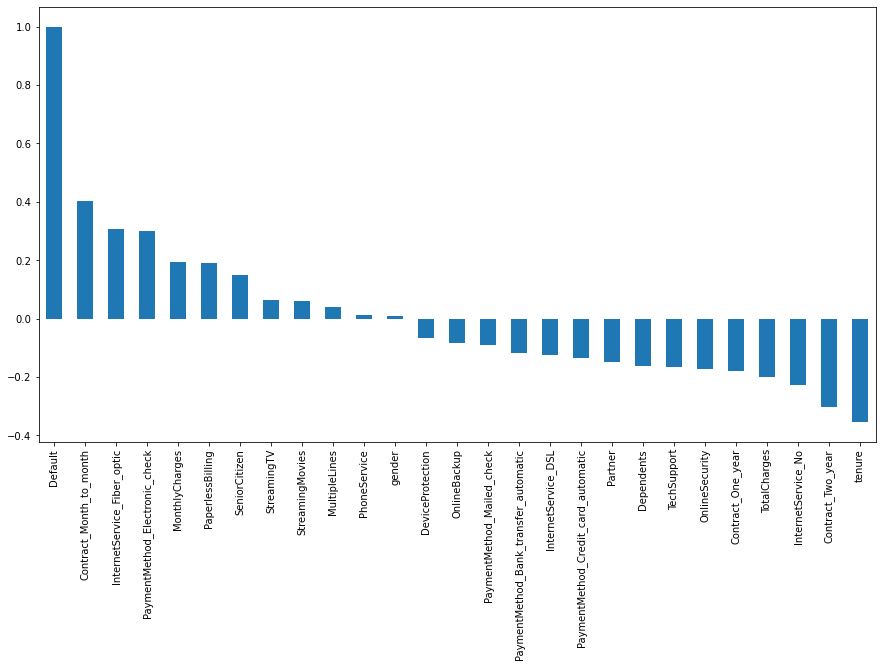

In [23]:
# get correlation of "Dafault" with other variables:
plt.figure(figsize=(15,8))

df.corr()['Default'].sort_values(ascending = False).plot(kind='bar')

It seems that customers who sign up for a monthly contract, use fiber optic as their Internet Service and have electronic check as their payment method tend to default.

On the flip side, customers holding a longer tenure with a two-year contract tend to be able to commit to their payments.

In [24]:
# look at general stats of the numeric columns
df[num_list].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [25]:
# check if imbalance
df['Default'].value_counts(normalize=True) * 100

0    73.421502
1    26.578498
Name: Default, dtype: float64

The dataset has 73% of the customers that did not defaulted on their payments. <br>
This is expected since we don't expect a significant group of people to default. <br>
Since the labels are undersampled, processing them may cause the Machine Learning or Deep Learning models to predict more false negatives. <br>
However, this can be taken into account in the evaluation metrics.

# Modeling
DL model used: TabNet : Attentive Interpretable Tabular Learning <br>
[GitHub link](https://github.com/dreamquark-ai/tabnet) <br>
[Paper](https://arxiv.org/pdf/1908.07442.pdf)

No need to perform any scaling or normalisation.

## Set Up

In [26]:
# import pytorch_tabnet
# from pytorch_tabnet.tab_model import TabNetClassifier
# import torch

# from sklearn.metrics import roc_auc_score, accuracy_score, fbeta_score

In [27]:
# create independent and depedendent variables
target = df["Default"]
features = df.copy().drop("Default", axis=1)

In [28]:
# from sklearn.model_selection import train_test_split

# train set
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.30, random_state=8)

# val set
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, random_state=8)

print("X train shape: ", x_train.shape)
print("X validation shape: ", x_val.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y validation shape: ", y_val.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (4922, 26)
X validation shape:  (1055, 26)
X test shape:  (1055, 26)
Y train shape:  (4922,)
Y validation shape:  (1055,)
Y test shape:  (1055,)


According to the documentation, TabNet only accepts NumPy arrays as input. Hence there is a need to convert them.

In [29]:
# convert all inputs into numpy arrays

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

## Build Model

In [30]:
# define model
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit model 
clf.fit(
    x_train,y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['auc','accuracy'],
    max_epochs=100 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)

Device used : cpu
epoch 0  | loss: 0.64795 | train_auc: 0.66687 | train_accuracy: 0.45815 | valid_auc: 0.62487 | valid_accuracy: 0.42085 |  0:00:01s
epoch 1  | loss: 0.50963 | train_auc: 0.75442 | train_accuracy: 0.46668 | valid_auc: 0.73949 | valid_accuracy: 0.45877 |  0:00:02s
epoch 2  | loss: 0.51004 | train_auc: 0.81709 | train_accuracy: 0.69403 | valid_auc: 0.80413 | valid_accuracy: 0.6891  |  0:00:02s
epoch 3  | loss: 0.48952 | train_auc: 0.83025 | train_accuracy: 0.70236 | valid_auc: 0.80444 | valid_accuracy: 0.69384 |  0:00:03s
epoch 4  | loss: 0.48402 | train_auc: 0.83965 | train_accuracy: 0.71577 | valid_auc: 0.81555 | valid_accuracy: 0.69005 |  0:00:04s
epoch 5  | loss: 0.48547 | train_auc: 0.84163 | train_accuracy: 0.72328 | valid_auc: 0.82077 | valid_accuracy: 0.709   |  0:00:05s
epoch 6  | loss: 0.47381 | train_auc: 0.84767 | train_accuracy: 0.75376 | valid_auc: 0.82286 | valid_accuracy: 0.72891 |  0:00:06s
epoch 7  | loss: 0.4725  | train_auc: 0.85061 | train_accuracy: 0

epoch 63 | loss: 0.36746 | train_auc: 0.92021 | train_accuracy: 0.83584 | valid_auc: 0.76698 | valid_accuracy: 0.72986 |  0:00:59s

Early stopping occurred at epoch 63 with best_epoch = 13 and best_valid_accuracy = 0.75924
Best weights from best epoch are automatically used!


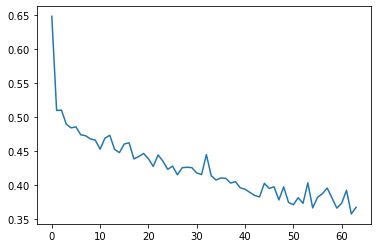

In [31]:
# plot losses
plt.plot(clf.history['loss'])

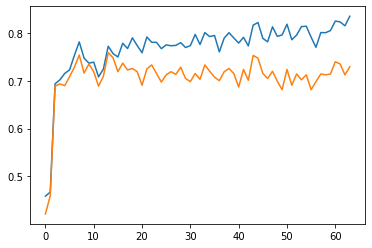

In [32]:
# plot accuracy
plt.plot(clf.history['train_accuracy'])
plt.plot(clf.history['valid_accuracy'])

<AxesSubplot:>

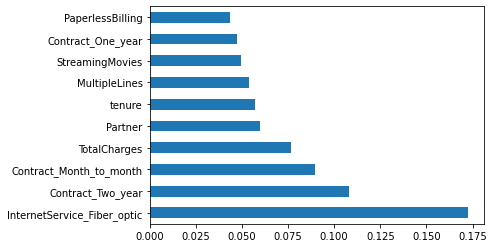

In [33]:
# make predictions
y_pred = clf.predict(x_test)

# plot feature importance
feat_importances = pd.Series(clf.feature_importances_, index=features.columns)
# show top 10 most important features
feat_importances.nlargest(10).plot(kind='barh')

## Evaluation
Since the dataset is imbalanced, using Classification Accuracy is not suitable since a high accuracy can already be achieved by just predicting the majoirty class (Default = 1).

Hence, I will use the **Area under Receiver Operating Characteristic Area Under Curve (ROC AUC)** because it is generic and used in case of unbalanced datasets [(paper)](https://journalofbigdata.springeropen.com/track/pdf/10.1186/s40537-019-0191-6.pdf). It can be optimistic under a class imbalance.

Furthermore, I will use the **F2 Score** since False Negatives (unable to predict the customer will default) are more important.
The F2 Score lowers the importance of precision and increases the importance of recall.

Maximising recall minimizes false negatives. Thus F2 Score forcuses on minimising false negatives than minimizing false positives.

### Metric 1: ROC AUC

In [34]:
# determine best ROC AUC for validation set
preds_val = clf.predict(x_val)
val_acc = roc_auc_score(y_val, preds_val)

# determine best ROC AUC for test set
preds = clf.predict(x_test)
test_acc = roc_auc_score(y_test, preds)


print(f"BEST ROC AUC SCORE ON VALIDATION SET: {val_acc}")
print(f"BEST ROC AUC SCORE ON TEST SET: {test_acc}")

BEST ROC AUC SCORE ON VALIDATION SET: 0.7620677199186295
BEST ROC AUC SCORE ON TEST SET: 0.743483709273183


### Metric 2: F2 Score

In [35]:
# determine best F2 for validation set
preds_val = clf.predict(x_val)
val_acc = fbeta_score(y_val, preds_val, beta=2)

# determine best F2 for test set
preds = clf.predict(x_test)
test_acc = fbeta_score(y_test, preds, beta=2)


print(f"BEST F2 SCORE ON VALIDATION SET: {val_acc}")
print(f"BEST F2 SCORE ON TEST SET: {test_acc}")

BEST F2 SCORE ON VALIDATION SET: 0.6996587030716724
BEST F2 SCORE ON TEST SET: 0.6775244299674268


In the end, the model is only about 60% right in predicting whether a customer would default on telco payments based on his/her telco data.

In [36]:
# create a Pickle file using serialisation
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(clf, pickle_out)
pickle_out.close()

In [37]:
# input information
features.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'InternetService_No', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaymentMethod_Bank_transfer_automatic',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check'],
      dtype='object')

In [38]:
# test classifier
inputs = [1., 0., 1., 1., 9,
              1., 0., 0., 0.,
              0., 0., 0., 0.,
              0., 24.5,100.5,
              0., 1.,
              0., 1., 0.,
              0., 0.,
              1.,
              0., 0.]

# convert to readable format for classifier
inputs = torch.from_numpy(np.asarray(inputs))
clf.predict([inputs])

array([1], dtype=int64)